# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [24]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [26]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [27]:
# Scrape the website
html = browser.html

In [28]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [29]:
# Extract all rows of data
table = soup.find('table',class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [30]:
# Create an empty list
data_rows  = []

# Loop through the scraped data to create a list of rows


rows = table.find_all('tr')[1:]  # Skip header row
for row in rows:
    columns = row.find_all('td')
    row_data = [column.text for column in columns]
    data_rows.append(row_data)

# Print the result
for row in data_rows:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [31]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Find the header row
header = [th.text for th in table.find_all('th')]

# Create a DataFrame
df = pd.DataFrame(data_rows, columns=header)

In [32]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [33]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [34]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)                                 #INT
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date']) #DATETIME
df['sol'] = df['sol'].astype(int)                               #INT
df['ls'] = df['ls'].astype(int)                                 #INT
df['month'] = df['month'].astype(int)                           #INT
df['min_temp'] = df['min_temp'].astype(float)                   #FLOAT
df['pressure'] = df['pressure'].astype(float)                   #FLOAT

In [35]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [36]:
# 1. How many months are there on Mars?
months = df['month'].nunique(dropna=True)
months

12

In [37]:
# 2. How many sols (Martian days) worth of data are there?
num_sols =  df['sol'].nunique(dropna=True)
num_sols

1867

In [38]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = round(df.groupby('month')['min_temp'].mean().reset_index(), 2)
average_min_temp_by_month


,month,min_temp
0,1,-77.16
1,2,-79.93
2,3,-83.31
3,4,-82.75
4,5,-79.31
5,6,-75.30
6,7,-72.28
7,8,-68.38
8,9,-69.17
9,10,-71.98


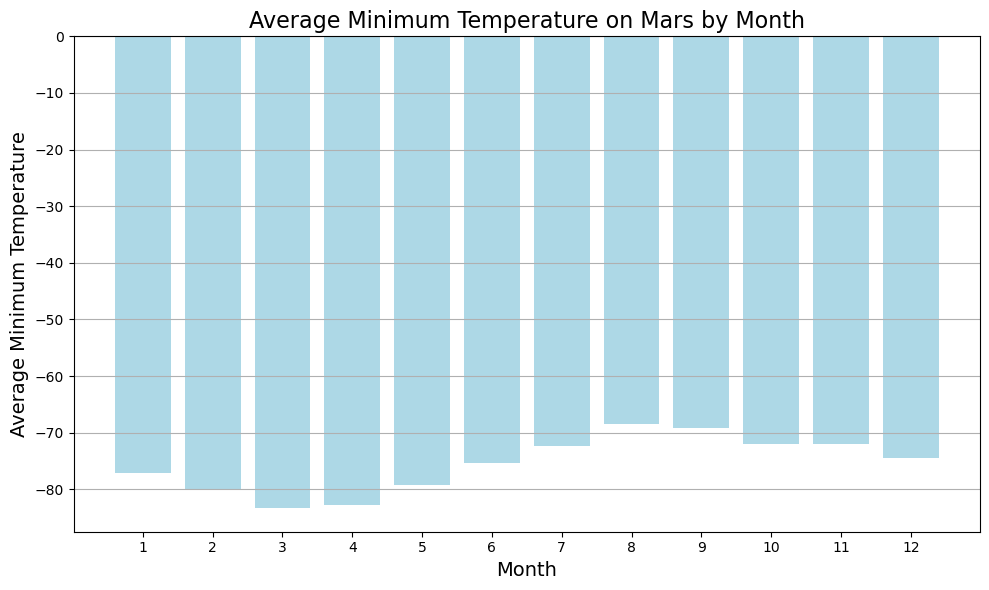

In [39]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
plt.bar(average_min_temp_by_month['month'], average_min_temp_by_month['min_temp'], color='lightblue')
plt.title('Average Minimum Temperature on Mars by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Minimum Temperature', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  # SHOW ALL 12 MONTHS
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [40]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the DataFrame by average minimum temperature
average_min_temp_by_month_sorted = average_min_temp_by_month.sort_values(by='min_temp')

# Identify the coldest and hottest months
coldest_month = average_min_temp_by_month_sorted.iloc[0]
hottest_month = average_min_temp_by_month_sorted.iloc[-1]

print(f"Coldest Month: Month {int(coldest_month['month'])} with an average temperature of {coldest_month['min_temp']:.2f}")
print(f"Hottest Month: Month {int(hottest_month['month'])} with an average temperature of {hottest_month['min_temp']:.2f}")


Coldest Month: Month 3 with an average temperature of -83.31
Hottest Month: Month 8 with an average temperature of -68.38


In [41]:
# 4. What is the average pressure by month?
average_pressure_by_month = round(df.groupby('month')['pressure'].mean().reset_index(),2)
average_pressure_by_month

,month,pressure
0,1,862.49
1,2,889.46
2,3,877.32
3,4,806.33
4,5,748.56
5,6,745.05
6,7,795.11
7,8,873.83
8,9,913.31
9,10,887.31


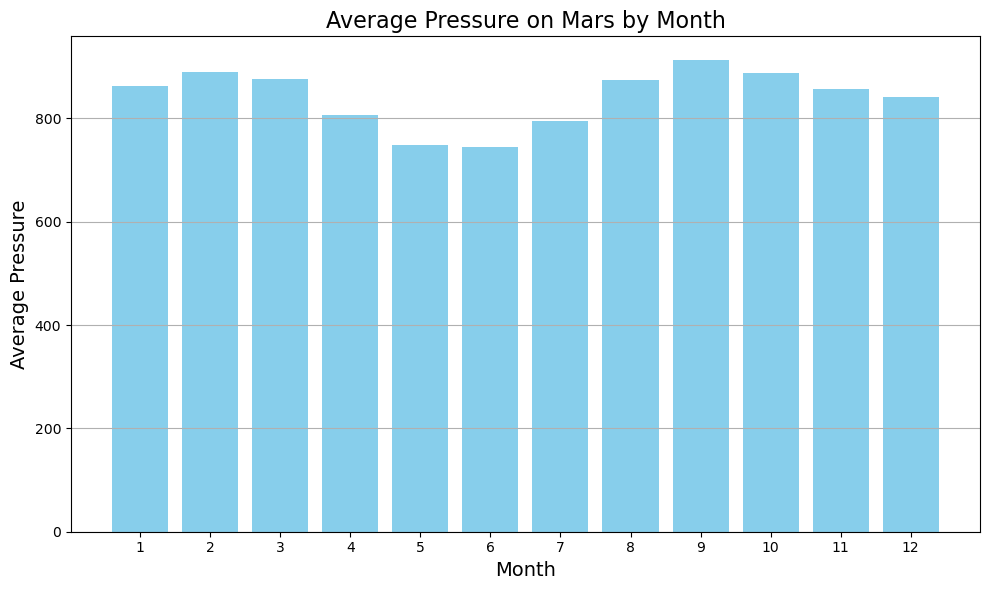

In [42]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(average_pressure_by_month['month'], average_pressure_by_month['pressure'], color='skyblue')

plt.title('Average Pressure on Mars by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Pressure', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  # Set x-ticks for months 1 to 12

plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [43]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the DataFrame by average pressure
average_pressure_by_month_sorted = average_pressure_by_month.sort_values(by='pressure')

# Identify the lowest and highest pressure months
lowest_pressure_month = average_pressure_by_month_sorted.iloc[0]
highest_pressure_month = average_pressure_by_month_sorted.iloc[-1]

# Print the results
print(f"Lowest Pressure Month: Month {int(lowest_pressure_month['month'])} with an average pressure of {lowest_pressure_month['pressure']}")
print(f"Highest Pressure Month: Month {int(highest_pressure_month['month'])} with an average pressure of {highest_pressure_month['pressure']}")


Lowest Pressure Month: Month 6 with an average pressure of 745.05
Highest Pressure Month: Month 9 with an average pressure of 913.31


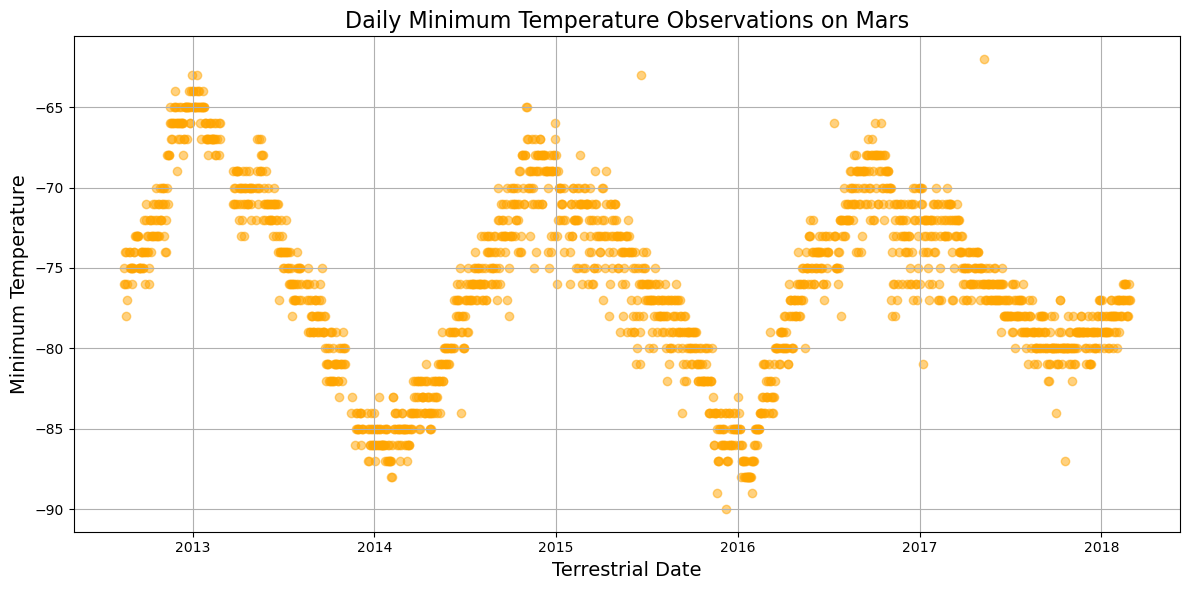

In [44]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Create a plot of daily minimum temperature
plt.figure(figsize=(12, 6))
plt.scatter(df['terrestrial_date'], df['min_temp'], color='orange', alpha=0.5)

plt.title('Daily Minimum Temperature Observations on Mars', fontsize=16)
plt.xlabel('Terrestrial Date', fontsize=14)
plt.ylabel('Minimum Temperature', fontsize=14)

plt.grid()
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### Minimum Temperature

March is the coldest month on Mars, with an average temperature of -83.31°F, indicating the planet's harsh winter conditions. August, the hottest month, averages -68.38°F, still well below freezing, demonstrating Mars' minimal seasonal temperature variation. 

#### Atmospheric Pressure

June has the lowest atmospheric pressure on Mars at 745.05, while September has the highest at 913.31. This variation indicates seasonal changes in Martian weather patterns.

#### Year Length

To approximate the number of Earth days in a Martian year, we can analyze a scatter plot of the daily minimum temperature observations on Mars. The plot reveals a pattern of peaks and troughs forming two V-shapes. By examining the x-axis, we can estimate the duration of these patterns. Focusing on the second V-shape, which starts slightly before 2015 and peaks again just before 2017, we observe that approximately two Earth years pass within a Martian year, roughly 730 days.

However, according to NASA, a Martian year is 687 Earth days. To calculate the margin of error, we subtract 687 from 730, giving us 43. We then divide this difference by the actual value (687) and multiply by 100, resulting in a margin of error of approximately 6%.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [45]:
# Write the data to a CSV
df.to_csv('data.csv', index=False)

In [46]:
browser.quit()